# Step 4: Pre-processing

## Imported Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy")
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor

## Data

In [2]:
df = pd.read_csv('collegedata_EDAd.csv')
print(df.head(2))

                             chronname        city    state   level control  \
0               Alabama A&M University      Normal  Alabama  4-year  Public   
1  University of Alabama at Birmingham  Birmingham  Alabama  4-year  Public   

                                               basic hbcu flagship  \
0  Masters Colleges and Universities--larger prog...  yes       no   
1  Research Universities--very high research acti...   no       no   

   student_count  awards_per_value  ...  grad_100_value  grad_150_value  \
0         4051.0              14.2  ...            10.0            29.1   
1        11502.0              20.9  ...            29.4            53.5   

   pell_value  retain_value  ft_fac_value  state_sector_ct  carnegie_ct  \
0        71.2          63.1          82.8             13.0          386   
1        35.1          80.2          92.4             13.0          106   

   counted_pct  cohort_size  num_similar  
0         99.7        882.0         20.0  
1         56.

In [3]:
print(df.shape)

(3798, 29)


In [4]:
print(df.columns)

Index(['chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu',
       'flagship', 'student_count', 'awards_per_value',
       'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value',
       'exp_award_state_value', 'exp_award_natl_value', 'ft_pct', 'fte_value',
       'aid_value', 'endow_value', 'grad_100_value', 'grad_150_value',
       'pell_value', 'retain_value', 'ft_fac_value', 'state_sector_ct',
       'carnegie_ct', 'counted_pct', 'cohort_size', 'num_similar'],
      dtype='object')


In [5]:
names_list = ['chronname', 'city', 'state']
df.drop(columns=names_list, inplace=True)
print(df.shape)

(3798, 26)


## Encoding Features

In [6]:
df.level.unique()

array(['4-year', '2-year'], dtype=object)

In [7]:
#OneHot encoding 
df = pd.get_dummies(df, columns=['level'], drop_first=False, prefix='level')

#Rename
df.rename(columns={
    'level_2-year':'2_yr_inst',
    'level_4-year':'4_yr_inst'
}, inplace=True)

In [8]:
df.control.unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [9]:
df = pd.get_dummies(df, columns=['control'], drop_first=False, prefix='c')
#Rename
df.rename(columns={
    'c_Public':'public',
    'c_Private not-for-profit':'private',
    'c_Private for-profit':'private_fp'
}, inplace=True)

In [10]:
df.hbcu.unique()

array(['yes', 'no'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns=['hbcu'], drop_first=False)

In [12]:
df.flagship.unique()

array(['no', 'yes'], dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['flagship'], drop_first=False)

In [14]:
print(df.columns)

Index(['basic', 'student_count', 'awards_per_value', 'awards_per_state_value',
       'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value',
       'exp_award_natl_value', 'ft_pct', 'fte_value', 'aid_value',
       'endow_value', 'grad_100_value', 'grad_150_value', 'pell_value',
       'retain_value', 'ft_fac_value', 'state_sector_ct', 'carnegie_ct',
       'counted_pct', 'cohort_size', 'num_similar', '2_yr_inst', '4_yr_inst',
       'private_fp', 'private', 'public', 'hbcu_no', 'hbcu_yes', 'flagship_no',
       'flagship_yes'],
      dtype='object')


In [15]:
counts = df.basic.value_counts()
print(counts)

basic
Associates--Private For-profit                                                  517
Masters Colleges and Universities--larger programs                              386
Baccalaureate Colleges--Diverse Fields                                          343
Associates--Public Rural-serving Medium                                         289
Baccalaureate Colleges--Arts & Sciences                                         252
Masters Colleges and Universities--medium programs                              169
Associates--Public Rural-serving Large                                          128
Associates--Public Urban-serving Multicampus                                    125
Baccalaureate/Associates Colleges                                               124
Schools of art- music- and design                                               114
Associates--Public Rural-serving Small                                          111
Associates--Public Suburban-serving Single Campus                     

In [16]:
#Limit columns in 'basic'
mask = df['basic'].isin(counts[counts <=114].index)
df['basic'][mask] = 'Other'
df.basic.unique()

C:\Users\MTIDES\AppData\Local\Temp\ipykernel_22012\1496826063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['basic'][mask] = 'Other'


array(['Masters Colleges and Universities--larger programs', 'Other',
       'Baccalaureate Colleges--Arts & Sciences',
       'Associates--Public Rural-serving Medium',
       'Baccalaureate Colleges--Diverse Fields',
       'Baccalaureate/Associates Colleges',
       'Associates--Public Rural-serving Large',
       'Associates--Public Urban-serving Multicampus',
       'Masters Colleges and Universities--medium programs',
       'Associates--Private For-profit'], dtype=object)

In [17]:
#OneHot encoding 
df = pd.get_dummies(df, columns=['basic'], drop_first=False, prefix='B')

#Rename
df.rename(columns={
    'B_Masters Colleges and Universities--larger programs':'masters_lp',
    'B_Baccalaureate Colleges--Arts & Sciences':'bachelors_as',
    'B_Associates--Public Rural-serving Medium':'associates_pr_sm',
    'B_Baccalaureate Colleges--Diverse Fields':'bacelors_df',
    'B_Baccalaureate/Associates Colleges':'bachelors_associates',
    'B_Associates--Public Rural-serving Large':'associates_pr_sl',
    'B_Associates--Public Urban-serving Multicampus':'associates_pu_multi',
    'B_Masters Colleges and Universities--medium programs':'masters_mp',
    'B_Associates--Private For-profit':'associates_privatefp',
    'B_Other':'Other_institutions'
}, inplace=True)

In [18]:
# Convert boolean features to binary (0 and 1)
for feature in df.select_dtypes(include=['bool']):
    df[feature] = df[feature].astype(int)

In [19]:
cols_to_convert = ['cohort_size', 'num_similar', 'grad_100_value', 'grad_150_value', 'retain_value', 'student_count', 
                   'awards_per_value', 'fte_value', 'exp_award_state_value', 'exp_award_natl_value']
df[cols_to_convert] = df[cols_to_convert].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_count           3798 non-null   int32  
 1   awards_per_value        3798 non-null   int32  
 2   awards_per_state_value  3798 non-null   float64
 3   awards_per_natl_value   3798 non-null   float64
 4   exp_award_value         3798 non-null   float64
 5   exp_award_state_value   3798 non-null   int32  
 6   exp_award_natl_value    3798 non-null   int32  
 7   ft_pct                  3798 non-null   float64
 8   fte_value               3798 non-null   int32  
 9   aid_value               3798 non-null   float64
 10  endow_value             3798 non-null   float64
 11  grad_100_value          3798 non-null   int32  
 12  grad_150_value          3798 non-null   int32  
 13  pell_value              3798 non-null   float64
 14  retain_value            3798 non-null   

## Correlation between Features

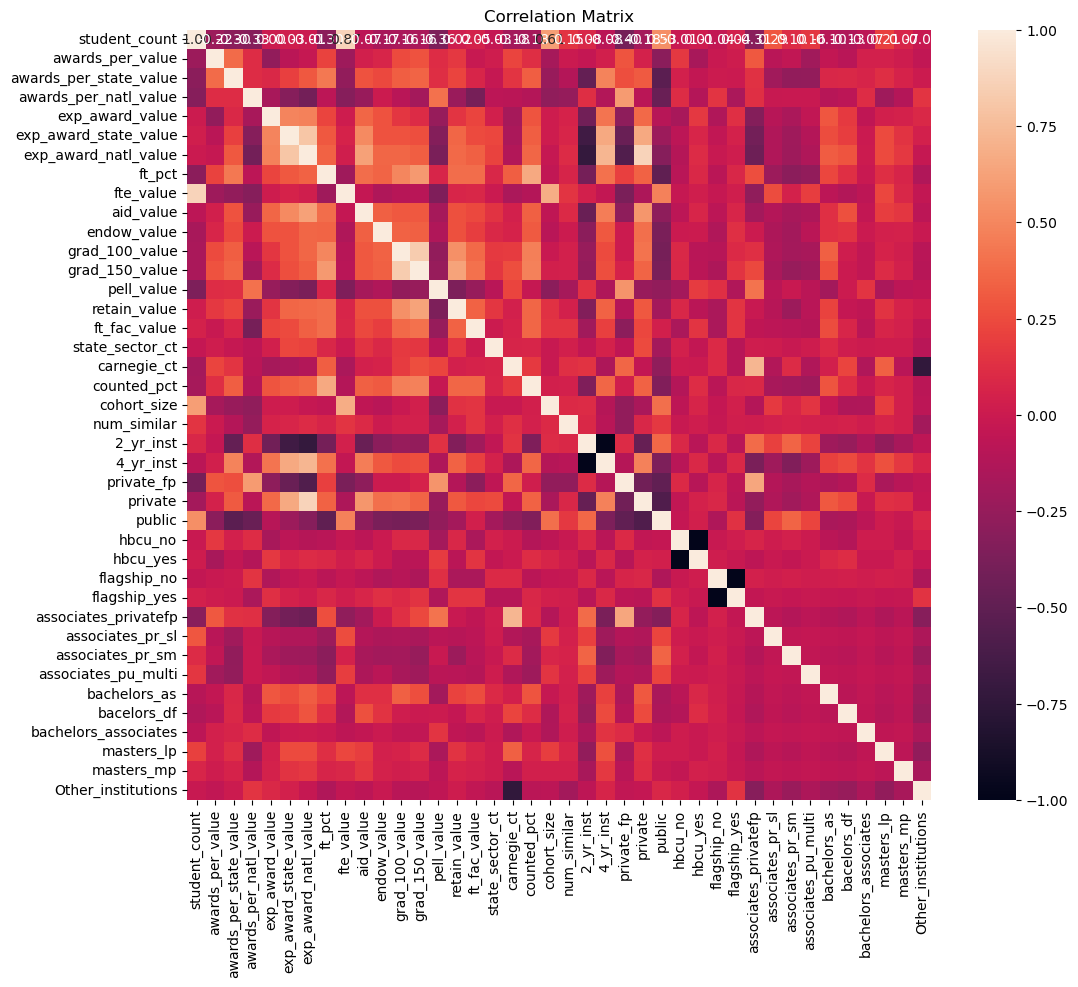

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show();

## Train/Test Split

In [22]:
len(df) * .8, len(df) * .2

(3038.4, 759.6)

In [23]:
X = df.drop(columns=['awards_per_value'])
y = df['awards_per_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

X_train.shape, X_test.shape

((3038, 39), (760, 39))

In [24]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**1. Linear Regression, r_squared**

In [26]:
rModel = LinearRegression()
rModel.fit(X_train_scaled, y_train)
acc = rModel.score(X_train_scaled, y_train)
print(f"R-squared is: {acc}")

y_pred= rModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"The MSE is: {mse}")

R-squared is: 0.323120601888931
The MSE is: 28.577535444183077


In [27]:
acc_score = r2_score(y_test, y_pred)
rounded_acc_score = round(acc_score * 100, 2)
print(f"The Accuracy of Prediction = {rounded_acc_score} %")

The Accuracy of Prediction = 33.11 %


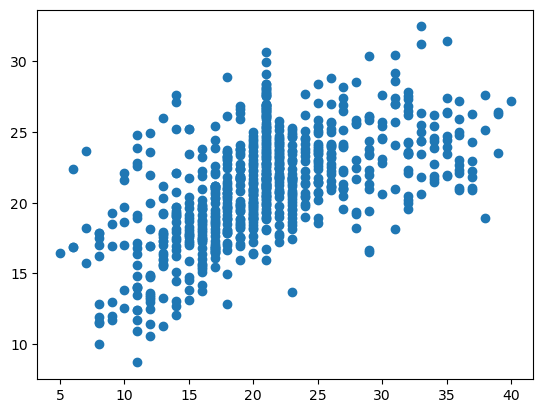

In [28]:
plt.scatter(y_test, y_pred)
plt.show();

- Training performance: The r^2 score  of about 32% on the training data suggests that the model is able to capture some of the relationships in the data, but weakly. The model may e underfitting the training data (not complex enough to cpture all patterns).
- Test performance: The MSE of 29 indicates the model's prediction error on unseen data. Given that the maximum value in the dependent varible is 40, this MSE is high, hence poor performance.

**2. LinearRegression, RandomForest,Decision Tree Models with Cross Validation**

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

num_folds = 5
results = {}
for name, model in models.items():
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=21)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_results)
    results[name] = rmse_scores

for name, scores in results.items():
    print(f"{name}: Mean RMSE: {scores.mean()}, Std Dev: {scores.std()}")

Linear Regression: Mean RMSE: 5.475153336396439, Std Dev: 0.12339797339610244
Random Forest: Mean RMSE: 4.925066282118758, Std Dev: 0.17513417206143464
Decision Tree: Mean RMSE: 6.897092478954418, Std Dev: 0.27856013222074083



- The RMSE measures the average magnitutde of the prediction errors (has same units as the target variable).
- A low standard deviation in the Linear Regression suggests the model is consistent (stable performance) across different CV folds.
- The Random Forest model has a smaller prediction error compared to the Linear Regression model. However, the standard deviation is slightly higher indicating a little bit more variability across different CV folds.
- The Decision Tree model appears to be the least accurate because it has the largest prediciton error and it is the largest variability across CV folds.
**NB:/ Random Forest has the best prediciton accuracy, Linear Regression is more stable across different CV folds, and Decision Tree is the worst performer.**

## Feature Importance

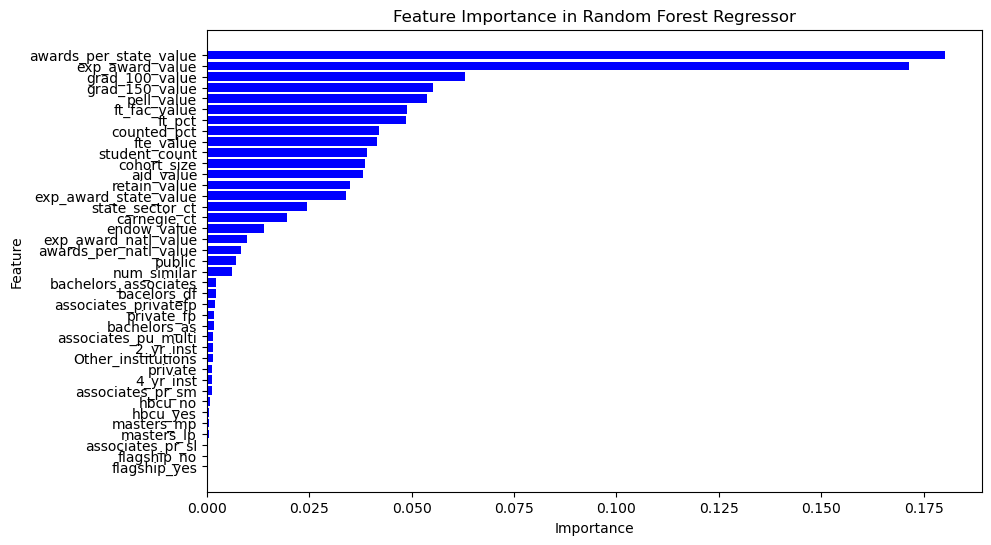

In [30]:
#Train a RF regressor
rf = RandomForestRegressor(n_estimators=100, random_state=21)
rf.fit(X_train_scaled, y_train)

#Get feature importances
feature_importances = rf.feature_importances_

#Plot feature importances
importance_df = pd.DataFrame({
    'Feature': df.drop('awards_per_value', axis=1).columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show();